In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image
import matplotlib.cm as cm
from pprint import pprint
import scipy.misc
import PIL

In [4]:
def is_background(mat,colno):
    row,col=mat.shape
    for i in range(0,row):
        if mat[i][colno]<0.9:
            return False
    return True

In [23]:
def get_next_nonbackground(mat,colno):
    row,col=mat.shape
    for i in range(colno+1,col):
        if is_background(mat,i)==False:
            return i
    return col-1
            

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


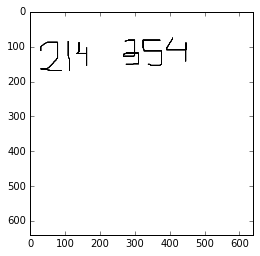

(163, 265)
(447, 639)


In [24]:
def get_words(mat):
    row,col=mat.shape
    for i in range(col):
        if is_background(mat,i)==False:
            next_bac=get_next_nonbackground(mat,i)
            if next_bac-i>threshold:
                print(i,next_bac)

threshold=60   
img=scipy.misc.imread('tempo.png')
img=img[:,:,1]
img=img/255.0
pyplot.imshow(img,cmap=cm.gray)
pyplot.show()
get_words(img)
        
    